### Init

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression      ## Model required for prediction
lr = LinearRegression()
from sklearn.model_selection import train_test_split   ## For splitting the data
from sklearn.preprocessing import OneHotEncoder        ## For Label Encoding
from sklearn.compose import ColumnTransformer          
from sklearn.impute import SimpleImputer               ## For filling the missing values
from sklearn.pipeline import Pipeline                  ## For introducing a pipeline structure
from sklearn.model_selection import cross_val_score    ## For evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score ## For evaluation
from sklearn.model_selection import RandomizedSearchCV ## For hyper-parameter Tuning 
from sklearn.model_selection import GridSearchCV       ## For hyper-parameter Tuning

#### The files that are required for importing and implementation

In [2]:
df = pd.read_csv("student-math.csv", sep = ";")
df.head(5).T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


### This was done for visualizing the whole data 

## EDA

In [3]:
df.shape

(395, 33)

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Attributes for student-math.csv (Math course) dataset:

1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)<br>
2 sex - student's sex (binary: "F" - female or "M" - male)<br>
3 age - student's age (numeric: from 15 to 22)<br>
4 address - student's home address type (binary: "U" - urban or "R" - rural<br>
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)<br>
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)<br>
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")<br>
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")<br>
12 guardian - student's guardian (nominal: "mother", "father" or "other")<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
16 schoolsup - extra educational support (binary: yes or no)<br>
17 famsup - family educational support (binary: yes or no)<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
19 activities - extra-curricular activities (binary: yes or no)<br>
20 nursery - attended nursery school (binary: yes or no)<br>
21 higher - wants to take higher education (binary: yes or no)<br>
22 internet - Internet access at home (binary: yes or no)<br>
23 romantic - with a romantic relationship (binary: yes or no)<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
30 absences - number of school absences (numeric: from 0 to 93)<br>
31 G1 - first period grade (numeric: from 0 to 20)<br>
31 G2 - second period grade (numeric: from 0 to 20)<br>
32 G3 - final grade (numeric: from 0 to 20)<br>




In [5]:
categorical_data = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        categorical_data.append(label)

In [6]:
df.isna().sum()
# No use of imputer is required as we have no missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### We actually came to know which all columns in our data frame are of string type

In [7]:
categorical_data
## Hence now we can use column transformer to tranform the following into numeric data

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [8]:
X = df.drop("G3", axis = 1)
X.columns
#Hence we got X as the input that we wanted 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [9]:
df['final_grade'] = df['G1']+df['G2']+df['G3']
y = df['final_grade']

In [10]:
one_hot = OneHotEncoder()
transformed = ColumnTransformer([('one_hot', one_hot, categorical_data)],
                               remainder = 'passthrough')
transformed_x = transformed.fit_transform(X)

In [11]:
transformed_x

array([[ 1.,  0.,  1., ...,  6.,  5.,  6.],
       [ 1.,  0.,  1., ...,  4.,  5.,  5.],
       [ 1.,  0.,  1., ..., 10.,  7.,  8.],
       ...,
       [ 0.,  1.,  0., ...,  3., 10.,  8.],
       [ 0.,  1.,  0., ...,  0., 11., 12.],
       [ 0.,  1.,  0., ...,  5.,  8.,  9.]])

In [12]:
transformed_x = transformed_x[:, 1:]
# We have done the same to avoid the dummy variable trap

In [13]:
transformed_x.shape
## Hence we have the data in form of numerical data that an be used by us for further processing 

(395, 57)

In [14]:
df.shape

(395, 34)

#### Hence we encoded the data required 

#### Train, Test, Split data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

### Fitting the data into a linear regression model

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Hence we had fit and tested the model 

In [17]:
lr.score(X_test, y_test)

0.9557005653137194

### We are getting a score of 95.5%

In [18]:
y_preds = lr.predict(X_test)
y_preds

array([39.44287109, 25.35205078, 47.95068359, 45.76416016, 49.97314453,
       33.13134766, 16.24414062, 39.48535156, 15.203125  , 29.01708984,
       36.81787109, 52.17480469, 35.92041016, 44.48925781, 33.00292969,
       23.52978516, 33.14697266, 36.66748047, 31.10449219, 19.67919922,
       24.80615234, 37.07763672, 43.28857422, 44.70410156, 31.67333984,
        5.25537109, 23.26660156, 28.90332031, 29.17578125, 29.50244141,
       43.25048828, 28.33642578, 32.76806641, 30.76757812, 20.52587891,
       41.09423828, 15.80078125, 30.46826172, 21.87109375, 31.67822266,
       27.60839844, 24.41699219, 33.13476562, 35.72607422, 19.42333984,
       26.73193359, 49.33349609, 40.78173828, 33.58447266, 46.83935547,
       38.34033203, 41.98876953, 32.73632812, 26.49072266, 24.33105469,
       33.33007812, 25.18457031, 17.8984375 , 27.99267578, 20.84033203,
       40.58349609, 31.10009766, 31.90966797, 42.01025391, 24.23486328,
       22.58398438, 36.70068359, 32.54150391, 26.57666016, 49.19

### The scatter plot

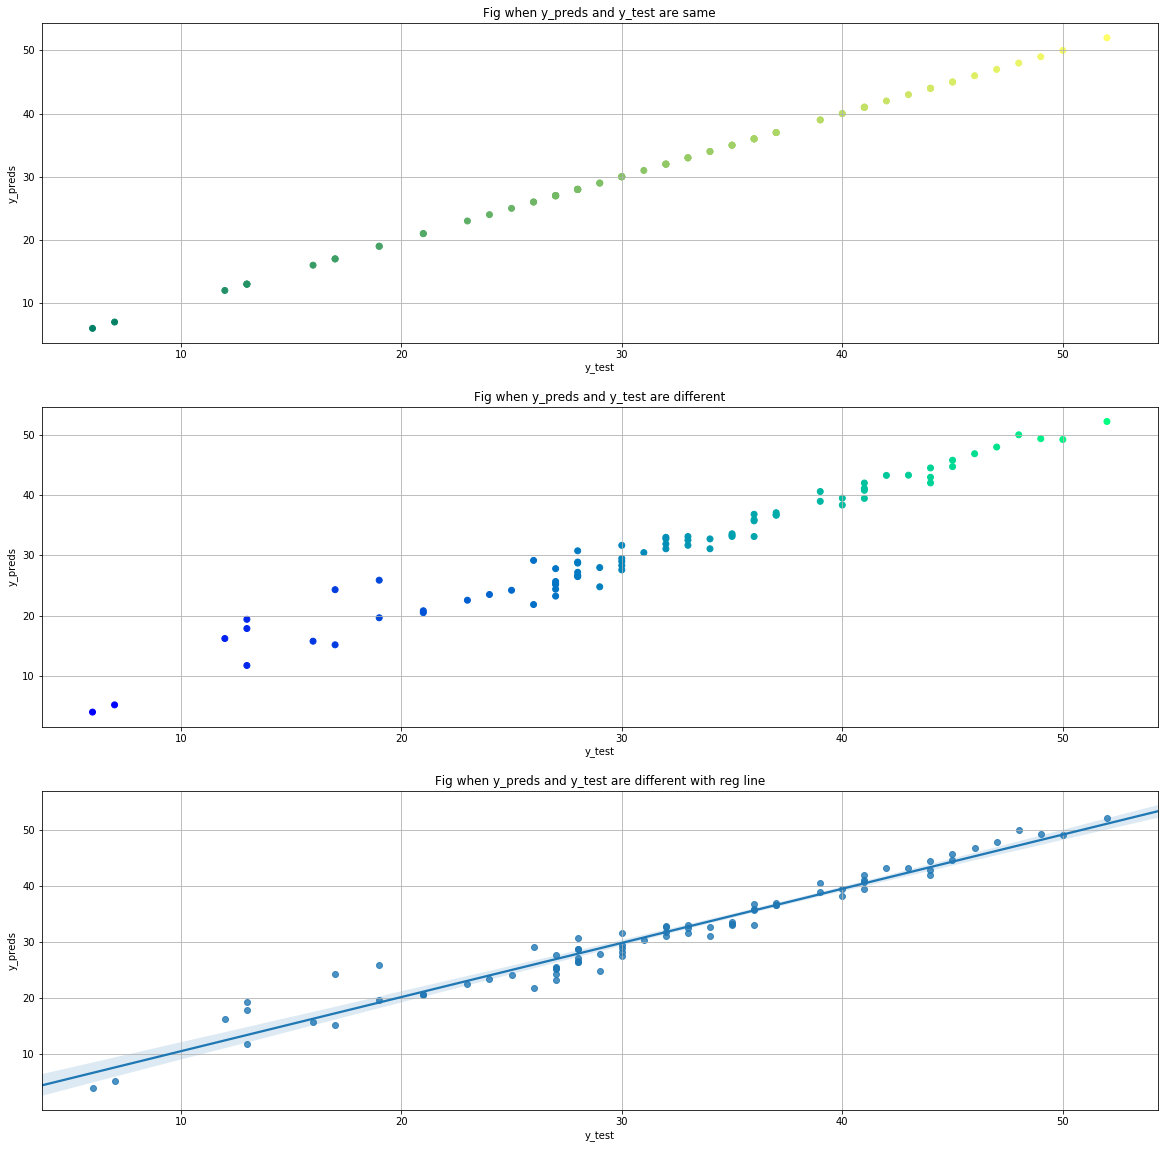

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 20))
a1 = ax0.scatter(x = y_test, y = y_test, c = y_test, cmap = "summer")
ax0.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are same")
ax0.grid(axis = "both")
plt.xticks(size = 10)
plt.yticks(size = 10)
a2 = ax1.scatter(x = y_test, y = y_preds, c = y_test, cmap = "winter")
ax1.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are different")
ax1.grid(axis = "both")
a3 = sns.regplot(x = y_test, y = y_preds)
ax2.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are different with reg line")
ax2.grid(axis = "both")

### Introducing statmodel.api for optimization of the regression model with backward eleimination

In [20]:
import statsmodels.api as sm

In [21]:
transformed_x = np.append(np.ones((395,1)).astype(int), values = transformed_x, axis = 1)
transformed_x
# This was appended to attach the b0 values to the coded labels content

array([[ 1.,  0.,  1., ...,  6.,  5.,  6.],
       [ 1.,  0.,  1., ...,  4.,  5.,  5.],
       [ 1.,  0.,  1., ..., 10.,  7.,  8.],
       ...,
       [ 1.,  1.,  0., ...,  3., 10.,  8.],
       [ 1.,  1.,  0., ...,  0., 11., 12.],
       [ 1.,  1.,  0., ...,  5.,  8.,  9.]])

In [28]:
optimised_x = transformed_x[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]]

In [29]:
reg_OLS = sm.OLS(endog = y, exog = optimised_x).fit()

In [25]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     318.5
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          3.24e-253
Time:                        16:58:08   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1215      0.245     -0.496      0.620      -0.603       0.360
x1             0.4807      0.367      1.312      0.190      -0.240       1.202
x2            -0.1480      0.166     -0.893      0.372      -0.474       0.178
x3             0.0264      0.173      0.153      0.878      -0.313       0.366
x4            -0.1130      0.194     -0.582      0.561      -0.495       0.269
x5            -0.0085      0.170     -0.050      0.960      -0.344       0.327
x6            -0.0790      0.165     -0.480      0.632      -0.403       0.245
x7            -0.0425      0.169     -0.252      0.802      -0.375       0.290
x8             0.0031      0.211      0.015      0.988      -0.411       0.417
x9            -0.1246      0.205     -0.608      0.543      -0.527       0.278
x10           -0.0140      0.287     -0.049      0.961      -0.578       0.550
x11           -0.1604      0.321     -0.500      0.617      -0.791       0.471
x12            0.0601      0.198      0.304      0.761      -0.328       0.449
x13            0.0330      0.198      0.166      0.868      -0.357       0.423
x14           -0.0403      0.284     -0.142      0.888      -0.600       0.519
x15            0.0131      0.393      0.033      0.973      -0.760       0.786
x16            0.3441      0.407      0.846      0.398      -0.456       1.144
x17           -0.0705      0.214     -0.330      0.742      -0.491       0.350
x18           -0.3090      0.224     -1.380      0.168      -0.749       0.131
x19           -0.0992      0.355     -0.280      0.780      -0.797       0.599
x20           -0.0873      0.181     -0.481      0.631      -0.444       0.269
x21           -0.2964      0.188     -1.576      0.116      -0.666       0.074
x22            0.2203      0.274      0.803      0.423      -0.319       0.760
x23            0.0419      0.199      0.211      0.833      -0.349       0.433
x24           -0.1079      0.201     -0.538      0.591      -0.503       0.287
x25            0.0878      0.166      0.529      0.597      -0.239       0.414
x26           -0.1014      0.325     -0.312      0.756      -0.741       0.538
x27           -0.2890      0.217     -1.335      0.183      -0.715       0.137
x28            0.1675      0.185      0.906      0.366      -0.196       0.531
x29           -0.1492      0.170     -0.877      0.381      -0.484       0.185
x30            0.0277      0.162      0.171      0.864      -0.291       0.346
x31           -0.0986      0.161     -0.614      0.540      -0.415       0.217
x32           -0.0229      0.170     -0.135      0.893      -0.357       0.311
x33            0.1123      0.158      0.710      0.478      -0.199       0.423
x34           -0.2338      0.162     -1.444      0.150      -0.552       0.085
x35            0.0506      0.175      0.289      0.773      -0.294       0.395
x3

## Here we have to figure out the P>|t| here the values whose value is more than 5% is not desired and hence we need to eliminate them

### Lets start removing some of the features by backward elilination method

In [30]:
optimised_x = transformed_x[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]]
reg_OLS = sm.OLS(endog = y, exog = optimised_x).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     318.5
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          3.24e-253
Time:                        17:01:23   Log-Likelihood:                -791.99
No. Observations:                 395   AIC:                             1668.
Df Residuals:                     353   BIC:                             1835.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1180      0.262     -0.450      0.653      -0.634       0.398
x1             0.4807      0.367      1.312      0.190      -0.240       1.202
x2            -0.1744      0.234     -0.747      0.456      -0.634       0.285
x3            -0.1112      0.200     -0.556      0.579      -0.505       0.282
x4            -0.0068      0.176     -0.038      0.969      -0.353       0.340
x5            -0.0773      0.171     -0.451      0.652      -0.414       0.260
x6            -0.0407      0.175     -0.232      0.816      -0.386       0.304
x7             0.0048      0.216      0.022      0.982      -0.420       0.430
x8            -0.1228      0.210     -0.585      0.559      -0.536       0.290
x9            -0.0133      0.287     -0.046      0.963      -0.579       0.552
x10           -0.1597      0.322     -0.496      0.620      -0.792       0.473
x11            0.0608      0.198      0.307      0.759      -0.329       0.450
x12            0.0337      0.199      0.169      0.866      -0.358       0.426
x13           -0.0395      0.285     -0.139      0.890      -0.600       0.521
x14            0.0138      0.394      0.035      0.972      -0.760       0.788
x15            0.3448      0.407      0.847      0.398      -0.456       1.146
x16           -0.0698      0.214     -0.326      0.745      -0.491       0.351
x17           -0.3083      0.224     -1.374      0.170      -0.750       0.133
x18           -0.0985      0.356     -0.277      0.782      -0.798       0.601
x19           -0.0864      0.183     -0.472      0.637      -0.446       0.274
x20           -0.2956      0.189     -1.562      0.119      -0.668       0.076
x21            0.2212      0.275      0.803      0.423      -0.321       0.763
x22            0.0427      0.200      0.213      0.831      -0.351       0.437
x23           -0.1068      0.202     -0.530      0.597      -0.503       0.290
x24            0.0890      0.167      0.533      0.595      -0.240       0.417
x25           -0.1002      0.329     -0.305      0.761      -0.747       0.546
x26           -0.2872      0.222     -1.293      0.197      -0.724       0.150
x27            0.1692      0.190      0.890      0.374      -0.205       0.543
x28           -0.1474      0.176     -0.835      0.404      -0.494       0.200
x29            0.0294      0.169      0.175      0.862      -0.302       0.361
x30           -0.0969      0.167     -0.581      0.561      -0.425       0.231
x31           -0.0211      0.177     -0.119      0.905      -0.369       0.327
x32            0.1140      0.165      0.689      0.491      -0.211       0.439
x33           -0.2320      0.168     -1.380      0.168      -0.563       0.099
x34            0.0524      0.182      0.288      0.773      -0.305       0.410
x35           -0.1704      0.184     -0.928      0.354      -0.532       0.191
x3

### Lets start removing the ones with more than 10%

In [32]:
optimised_x = transformed_x[:, [49,55,56,57]]
reg_OLS = sm.OLS(endog = y, exog = optimised_x).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_grade   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.862e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:06:37   Log-Likelihood:                         -829.84
No. Observations:                 395   AIC:                                      1668.
Df Residuals:                     391   BIC:                                      1684.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1854      0.070     -2.636      0.009      -0.324      -0.047
x2             0.0245      0.012      1.983      0.048       0.000       0.049
x3             1.0594      0.056     18.861      0.000       0.949       1.170
x4             1.9769      0.051     38.865      0.000       1.877       2.077
==============================================================================
Omnibus:                      247.354   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1731.749
Skew:                          -2.725   Prob(JB):                         0.00
Kurtosis:                      11.690   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We did this because the other features were contributing too slightly and were rather absurding the results. Doing this at once wont much affect the model because they were very high values.

In [33]:
## Rather than using the transformed_x lets use the optimized_x in order to get desired results
X_train, X_test, y_train, y_test = train_test_split(optimised_x, y, test_size = 0.2, random_state = 42)

In [34]:
lr1 = LinearRegression(n_jobs = -1)
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [35]:
y_preds_new = lr1.predict(X_test)

In [36]:
lr1.score(X_test, y_test)

0.9687537519675966

# Hence we see here that we were able to optimize the model and increase its accuracy by almost 1.5% that is the new accuracy becomes 97%

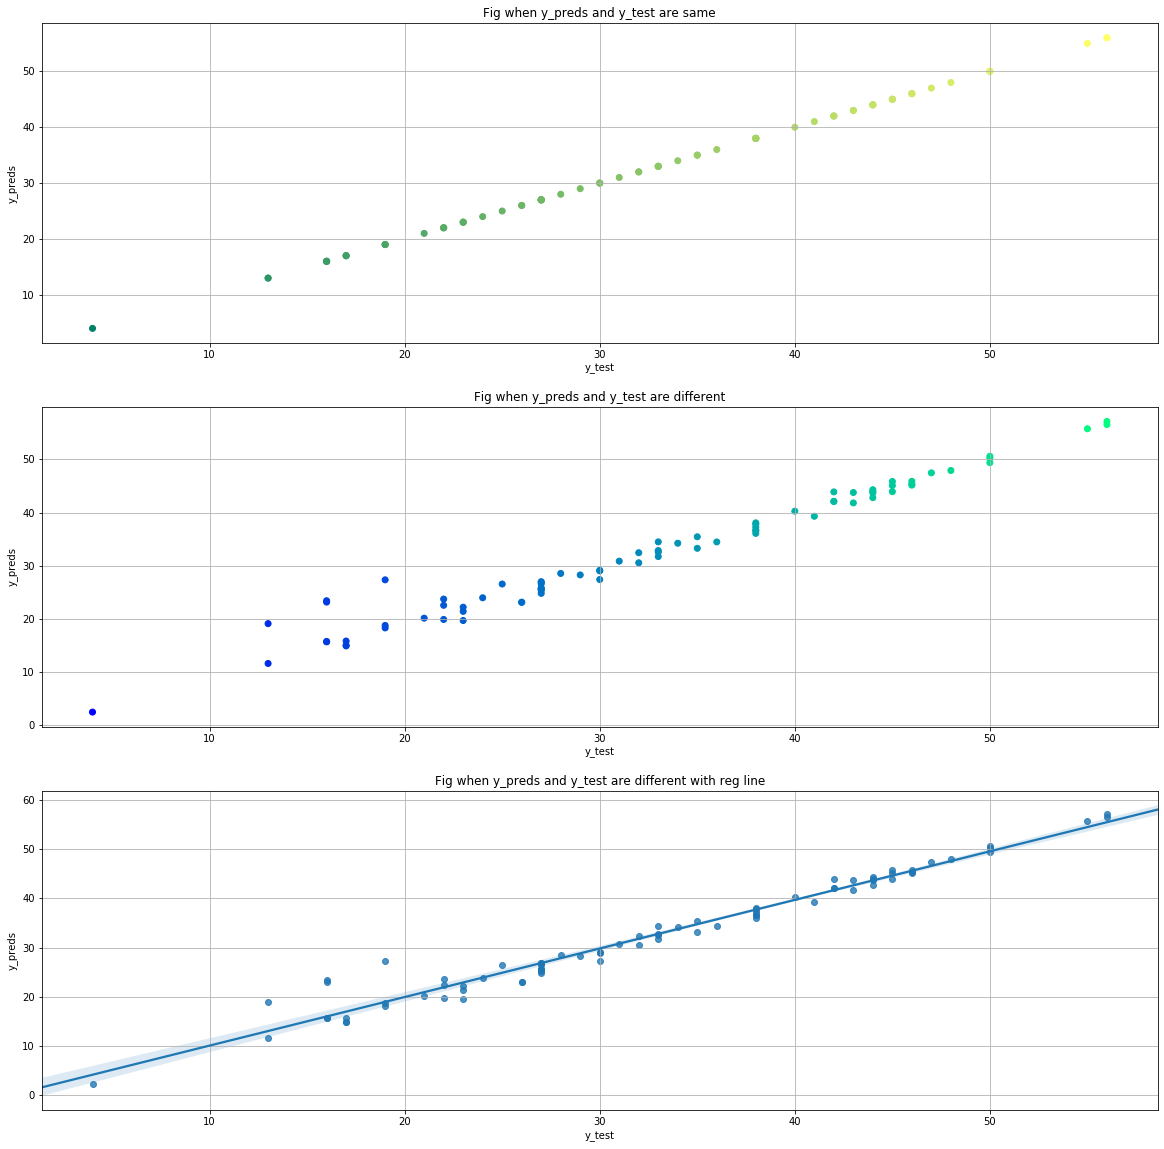

In [37]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 20))
a1 = ax0.scatter(x = y_test, y = y_test, c = y_test, cmap = "summer")
ax0.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are same")
ax0.grid(axis = "both")
plt.xticks(size = 10)
plt.yticks(size = 10)
a2 = ax1.scatter(x = y_test, y = y_preds_new, c = y_test, cmap = "winter")
ax1.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are different")
ax1.grid(axis = "both")
a3 = sns.regplot(x = y_test, y = y_preds_new)
ax2.set(xlabel = "y_test", ylabel = "y_preds", title = "Fig when y_preds and y_test are different with reg line")
ax2.grid(axis = "both")

## Finally we can save the model using joblib dump and load

In [38]:
from joblib import dump, load

In [39]:
dump(lr1, filename = "predictor.joblib")

['predictor.joblib']

In [40]:
a = load(filename = "predictor.joblib")

## We are done we can finally use the joblib file anywhere if we wanna predict the scores and the grade